In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('titanic.csv')

In [8]:
titanic.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [9]:
titanic.groupby('sex').mean()["age"]

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [15]:
titanic.groupby(by=['sex','survived']).mean()['age']

sex     survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: age, dtype: float64

In [16]:
titanic.groupby('sex')[["fare", "age"]].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [18]:
df = titanic.groupby("sex").mean()
df

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


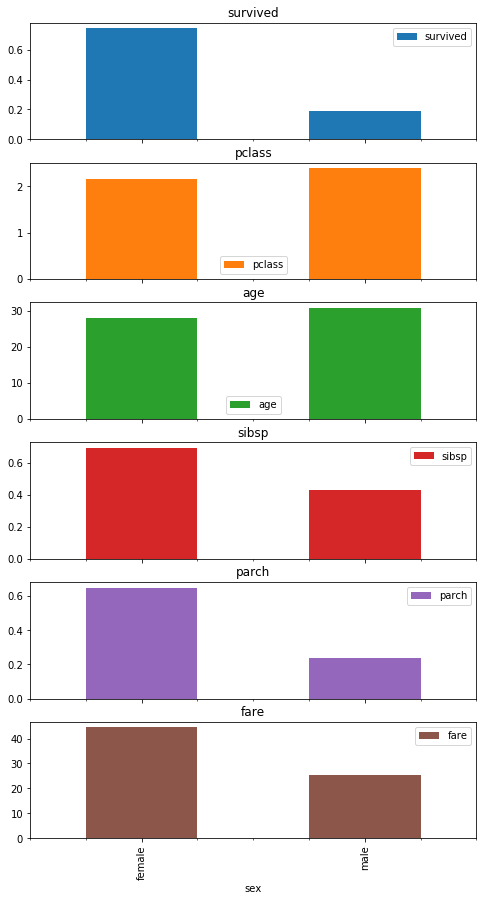

In [27]:
df.plot(kind="bar", subplots=True,figsize=(8,15))
plt.show()

In [28]:
summer = pd.read_csv('summer.csv')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [30]:
medal_per_country = summer.groupby('Country').Medal.count()
medal_per_country

Country
AFG      2
AHO      1
ALG     15
ANZ     29
ARG    259
      ... 
VIE      2
YUG    435
ZAM      2
ZIM     23
ZZX     48
Name: Medal, Length: 147, dtype: int64

In [33]:
medal_per_country = summer.groupby('Country').Medal.count().nlargest(n=10)
medal_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
Name: Medal, dtype: int64

[]

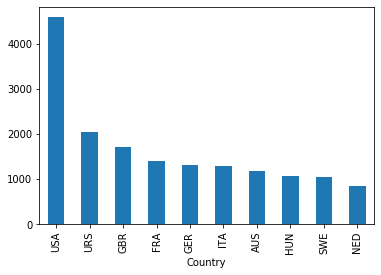

In [35]:
medal_per_country.plot(kind="bar")
plt.plot()

In [36]:
titanic.fare.mean()

32.2042079685746

In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [39]:
titanic.groupby(by=["pclass", "embarked"]).fare.mean()

pclass  embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: fare, dtype: float64

In [41]:
titanic.survived.mean()

0.3838383838383838

In [45]:
gender_class_grp = titanic.groupby(by=["sex", "pclass"]).survived.mean()
gender_class_grp

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

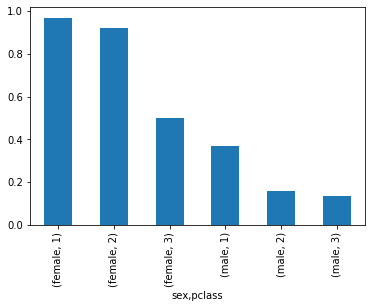

In [47]:
gender_class_grp.plot(kind='bar')

## Transformation

In [48]:
titanic.groupby(["sex", "pclass"]).survived.mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [49]:
titanic.groupby(["sex", "pclass"]).survived.transform("mean")

0      0.135447
1      0.968085
2      0.500000
3      0.968085
4      0.135447
         ...   
886    0.157407
887    0.968085
888    0.500000
889    0.368852
890    0.135447
Name: survived, Length: 891, dtype: float64

In [50]:
titanic["grp_sur_rate"] = titanic.groupby(["sex", "pclass"]).survived.transform("mean")

In [51]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,grp_sur_rate
0,0,3,male,22.0,1,0,7.2500,S,NaN,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,0.968085
2,1,3,female,26.0,0,0,7.9250,S,NaN,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,0.968085
4,0,3,male,35.0,0,0,8.0500,S,NaN,0.135447


In [52]:
titanic['outliers'] = abs(titanic.survived-titanic.grp_sur_rate)

In [55]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,grp_sur_rate,outliers
0,0,3,male,22.0,1,0,7.2500,S,NaN,0.135447,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,0.968085,0.031915
2,1,3,female,26.0,0,0,7.9250,S,NaN,0.500000,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,0.968085,0.031915
4,0,3,male,35.0,0,0,8.0500,S,NaN,0.135447,0.135447


In [58]:
titanic[titanic.outliers>0.85].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,grp_sur_rate,outliers
36,1,3,male,NaN,0,0,7.2292,C,NaN,0.135447,0.864553
41,0,2,female,27.0,1,0,21.0000,S,NaN,0.921053,0.921053
65,1,3,male,NaN,1,1,15.2458,C,NaN,0.135447,0.864553
74,1,3,male,32.0,0,0,56.4958,S,NaN,0.135447,0.864553
81,1,3,male,29.0,0,0,9.5000,S,NaN,0.135447,0.864553


## Replacing NA values by group-specific values

In [67]:
titanic.groupby(["sex","pclass","survived"]).age.mean()

sex     pclass  survived
female  1       0           25.666667
                1           34.336587
        2       0           36.000000
                1           28.102792
        3       0           24.108290
                1           22.634624
male    1       0           41.888167
                1           35.251114
        2       0           33.234356
                1           17.346003
        3       0           28.491782
                1           23.232004
Name: age, dtype: float64

In [68]:
grp_mean_age = titanic.groupby(["sex","pclass","survived"]).age.transform("mean")

In [69]:
titanic.age.fillna(grp_mean_age,inplace=True)

In [70]:
titanic.isnull().sum()

survived          0
pclass            0
sex               0
age               0
sibsp             0
parch             0
fare              0
embarked          2
deck            688
grp_sur_rate      0
outliers          0
dtype: int64